# **Image Classification on CIFAR10 dataset (Tensorflow)**

# 1. Import the required libraries

In [ ]:
##---------Type the code below this line------------------##
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# 2. Data Acquisition  

> We have found in tensorflow.keras.datasets

## 2.1 Code for converting the above downloaded data into a form suitable for DL



In [ ]:
##---------Type the code below this line------------------##
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

### 1. Size of the dataset
> Total size 60000. The dataset is divided into 50,000 training images and 10,000 testing images.

In [ ]:
print("Training set size:", len(train_images))
print("Testing set size:", len(test_images))


Training set size: 50000
Testing set size: 10000


### 2. What type of data attributes are there?
> Each image in the CIFAR-10 dataset is a 32x32 pixel RGB image. So, the data attributes are pixel values for each color channel (Red, Green, Blue).

In [ ]:
# Shape of one image in the dataset
image_shape = train_images[0].shape
print("Image Shape:", image_shape)
# Data attributes
print("\nData attributes:")
print(f"Pixel value range: {train_images.min()} to {train_images.max()}")
print(f"Data type: {train_images.dtype}")


Image Shape: (32, 32, 3)

Data attributes:
Pixel value range: 0 to 255
Data type: uint8


### 3. What are you classifying?
>We are classifying images into one of the 10 categories mentioned in document (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck).

In [ ]:
# Unique classes in the dataset
unique_classes = np.unique(train_labels)
print("Unique Classes:", unique_classes)


Unique Classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Classes (What are you classifying?)
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
num_classes = len(class_names)

print("\nClasses (What are you classifying?):")
for i, class_name in enumerate(class_names):
    print(f"{i} - {class_name}")


Classes (What are you classifying?):
0 - airplane
1 - automobile
2 - bird
3 - cat
4 - deer
5 - dog
6 - frog
7 - horse
8 - ship
9 - truck


### Dataset images along with their class labels :

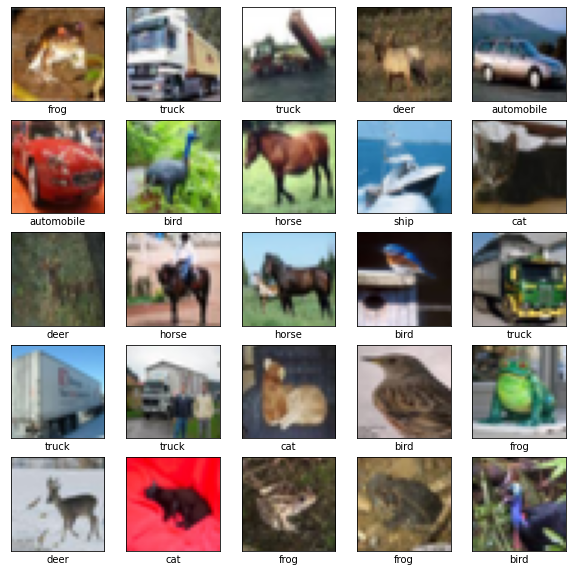

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class names for CIFAR-10 dataset
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Function to display images along with their class labels
def display_images(images, labels, class_names, num_images=25):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[int(labels[i])])  # Display correct class name
    plt.show()

# Display a sample of images from the CIFAR-10 dataset
display_images(train_images, train_labels, class_names)


### 4. Plot the distribution of the categories of the target / label.

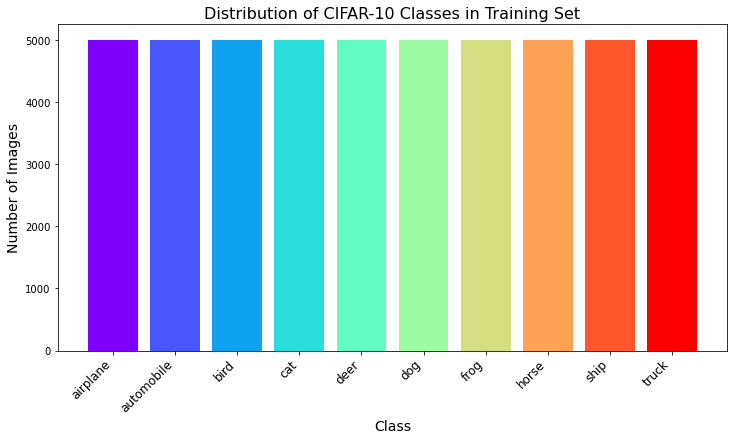

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Count occurrences of each class in the training set
class_counts = np.bincount(train_labels.flatten())

# Plot the distribution with different colors for each label and a larger graph
fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(class_counts)))

ax.bar(range(10), class_counts, color=colors)
ax.set_xticks(range(10))
ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize=12)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Distribution of CIFAR-10 Classes in Training Set', fontsize=16)
plt.show()


> 1. Image dataset doesn't consist any duplicate data.
> 2. From above distribution plot we can see there is no missing data or data inconsistencies.
> 3. Labels in the dataset already have categorical data as shown above. But those are ordinal. So we have encoded that with one hot encoding.
> 4. Feature Engineering not required.
> 5. Stop word removal, lemmatiation, stemming, vectorization not required.

### Normalize the data

In [ ]:
##---------Type the code below this line------------------##
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

> Normalizing the pixel values and, optionally, performing data augmentation. The above code divides the pixel values of each image by 255 to normalize them to the range [0, 1].

## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.





In [ ]:
##---------Type the code below this line------------------##
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [ ]:
print(train_labels[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


# 4. Deep Neural Network Architecture


## 4.1 Design the architecture

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required



In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Create a Sequential model
model = models.Sequential()

# Flatten the input layer
model.add(layers.Flatten(input_shape=(32, 32, 3)))

# First hidden layer with 128 units, ReLU activation, and Batch Normalization
model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Second hidden layer with 64 units, ReLU activation, and Batch Normalization
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

# Output layer with 10 units (for 10 classes in CIFAR-10) and softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

## 4.2 DNN Report

Report the following and provide justification for the same.



* Number of layers
* Number of units in each layer
* Total number of trainable parameters



> From the summary we can  see the model uses a simple feedforward neural network with one input layer, two hidden layers, each followed by a ReLU activation function. The output layer has 10 units and uses the softmax activation function. Here, I have used Batch normalization after each dense layer.

> Input layer has 3072 neuron, first dense layer has 256 neuron, second dense layer has 64 neuron and output layer has 10 neuron.

> Trainable parameters : 804426

# 5. Training the model


## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
##---------Type the code below this line------------------##

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.

### Training the model without cross validation using adam optimizer (simple)

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/20
1563/1563 [==============================] - 23s 13ms/step - loss: 1.6634 - accuracy: 0.4094 - val_loss: 1.6235 - val_accuracy: 0.4263
Epoch 2/20
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4594 - accuracy: 0.4810 - val_loss: 1.7897 - val_accuracy: 0.3984
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3755 - accuracy: 0.5099 - val_loss: 1.5759 - val_accuracy: 0.4384
Epoch 4/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3090 - accuracy: 0.5367 - val_loss: 1.5561 - val_accuracy: 0.4448
Epoch 5/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2545 - accuracy: 0.5551 - val_loss: 1.5368 - val_accuracy: 0.4580
Epoch 6/20
1563/1563 [==============================] - 20s 13ms/step - loss: 1.2086 - accuracy: 0.5721 - val_loss: 1.4597 - val_accuracy: 0.4802
Epoch 7/20
1563/1563 [==============================] - 21s 13ms/step - loss: 1.1708 - accuracy: 0.5850 - val_loss: 1.6028 -

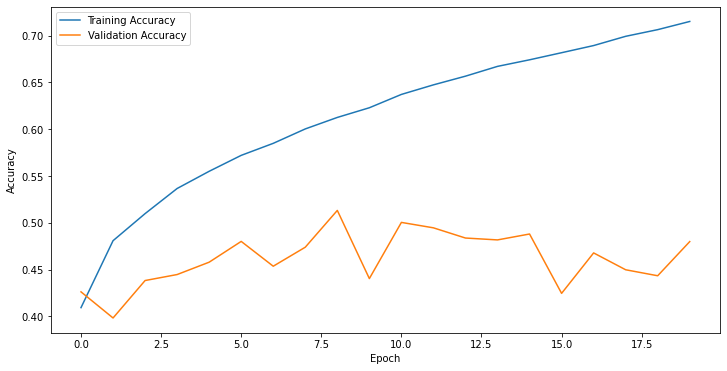

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Print final training accuracy
final_training_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_training_accuracy * 100:.2f}%")

# Print final testing accuracy
final_testing_accuracy = history.history['val_accuracy'][-1]
print(f"Final Testing Accuracy: {final_testing_accuracy * 100:.2f}%")


Final Training Accuracy: 71.52%
Final Testing Accuracy: 48.00%


# Training the model with k-fold cross validation using SGD (validation step is included)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold
import time
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

# Function to create the original model with the specified architecture
def create_original_model():
    model = models.Sequential()

    # Flatten the input layer
    model.add(layers.Flatten(input_shape=(32, 32, 3)))

    # First hidden layer with 128 units, ReLU activation, and Batch Normalization
    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Second hidden layer with 64 units, ReLU activation, and Batch Normalization
    model.add(layers.Dense(64))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Output layer with 10 units (for 10 classes in CIFAR-10) and softmax activation
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the original model
original_model = create_original_model()

# Train and evaluate the original model
history_list = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

for train_index, val_index in kf.split(train_images):
    print(f"\nTraining on Fold {fold}")
    X_train, X_val = train_images[train_index], train_images[val_index]
    y_train, y_val = train_labels[train_index], train_labels[val_index]

    start_time = time.time()

    # Train the original model for 20 epochs
    history = original_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

    history_list.append(history.history)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"\nTime taken for Fold {fold}: {elapsed_time:.2f} seconds")

    fold += 1



Training on Fold 1
Epoch 1/20
1250/1250 [==============================] - 13s 9ms/step - loss: 1.7566 - accuracy: 0.3774 - val_loss: 1.6747 - val_accuracy: 0.3972
Epoch 2/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5365 - accuracy: 0.4596 - val_loss: 1.6047 - val_accuracy: 0.4341
Epoch 3/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4419 - accuracy: 0.4915 - val_loss: 1.6088 - val_accuracy: 0.4323
Epoch 4/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3728 - accuracy: 0.5153 - val_loss: 1.6672 - val_accuracy: 0.4168
Epoch 5/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.3180 - accuracy: 0.5332 - val_loss: 1.4796 - val_accuracy: 0.4828
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2728 - accuracy: 0.5511 - val_loss: 1.5126 - val_accuracy: 0.4692
Epoch 7/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2276 - accuracy: 0.5685 - val_loss: 1

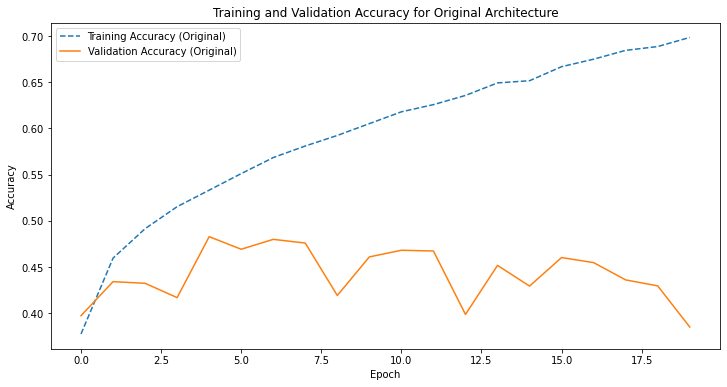

In [ ]:
# Plot training and validation accuracy for the original model
plt.figure(figsize=(12, 6))
plt.plot(history_list[0]['accuracy'], label='Training Accuracy (Original)', linestyle='--')
plt.plot(history_list[0]['val_accuracy'], label='Validation Accuracy (Original)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy for Original Architecture')
plt.show()

Justify your choice of optimizers and regulizations used and the hyperparameters tuned:

> Optimizer SGD It performs well in practice and is computationally efficient. It updates the model's parameters in the direction that minimizes the loss function, making it suitable for the task of minimizing the categorical crossentropy loss in a classification problem.

>Activation Function (ReLU) and Output Layer: ReLU is used as the activation function for hidden layers, and softmax for the output layer.ReLU is a widely used activation function that introduces non-linearity to the model. Softmax is appropriate for multi-class classification problems, providing probabilities for each class.

>Loss Function (Categorical Crossentropy): we have to use one hot encoding for that.

>Learning Rate and Training Epochs: Learning rate and number of training epochs are often hyperparameters that need tuning. A learning rate of 0.001 is used, and the model is trained for 20 epochs. These values might require adjustment based on the specific characteristics of the data and the performance of the model during training.

# 6. Test the model


In [ ]:
# Assuming you have already loaded and preprocessed your test data (test_images, test_labels)

# Evaluate the model on the test set
test_loss, test_accuracy = original_model.evaluate(test_images, test_labels)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 2.9127 - accuracy: 0.4480

Test Accuracy: 44.80%
Test Loss: 2.9127


# 7. Intermediate result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


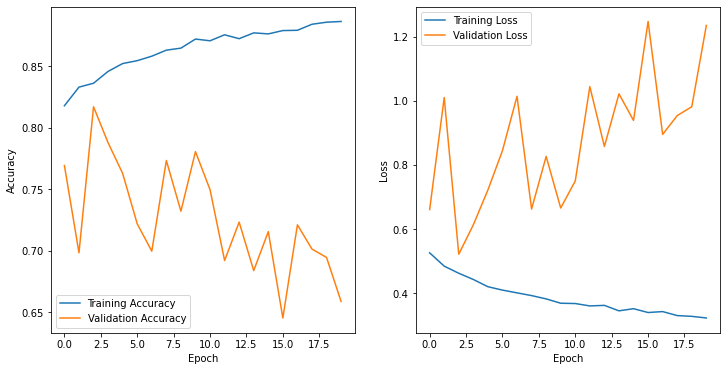

In [ ]:
import matplotlib.pyplot as plt

# Assuming history is returned from the model.fit() method
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 [==============================] - 1s 3ms/step


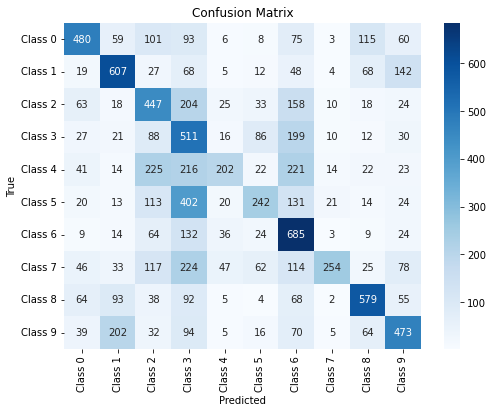

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you've already trained the model and have predictions
# Get predictions on the test set
predictions = original_model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()

# Convert true labels back from categorical to integer
true_labels = tf.argmax(test_labels, axis=1).numpy()

# Create a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class '+str(i) for i in range(10)], yticklabels=['Class '+str(i) for i in range(10)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Convert true labels back from categorical to integer
true_labels = tf.argmax(test_labels, axis=1).numpy()

# Calculate performance study metrics
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)

# Print the performance study metrics
print(f"\nAccuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Class '+str(i) for i in range(10)]))



Accuracy: 44.80%
Precision: 0.5092
Recall: 0.4480
F1 Score: 0.4435

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.59      0.48      0.53      1000
     Class 1       0.57      0.61      0.59      1000
     Class 2       0.36      0.45      0.40      1000
     Class 3       0.25      0.51      0.34      1000
     Class 4       0.55      0.20      0.30      1000
     Class 5       0.48      0.24      0.32      1000
     Class 6       0.39      0.69      0.49      1000
     Class 7       0.78      0.25      0.38      1000
     Class 8       0.63      0.58      0.60      1000
     Class 9       0.51      0.47      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.44     10000
weighted avg       0.51      0.45      0.44     10000



# 8. Model architecture


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold
import time


# Function to create a model with a specified architecture
def create_model(hidden_layers):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

    for layer in hidden_layers:
        model.add(tf.keras.layers.Dense(layer['units'], activation='relu'))
        model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Number of hidden layers in the original architecture
original_layers = [{'units': 256}, {'units': 64}]

# Number of hidden layers for decreased and increased architectures
decreased_layers = original_layers[:-1]
increased_layers = original_layers + [{'units': 32}]  # You can adjust the number of units as needed

# Create models
#original_model = create_model(original_layers)
decreased_model = create_model(decreased_layers)
increased_model = create_model(increased_layers)

# Train and evaluate models
models = [decreased_model, increased_model]
history_list = []

for i, model in enumerate(models):
    print(f"\nTraining Model {i + 1}")

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold = 1
    fold_histories = []

    for train_index, val_index in kf.split(train_images):
        print(f"\nTraining on Fold {fold}")
        X_train, X_val = train_images[train_index], train_images[val_index]
        y_train, y_val = train_labels[train_index], train_labels[val_index]

        start_time = time.time()

        # Train the model for 20 epochs
        history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

        fold_histories.append(history.history)

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"\nTime taken for Fold {fold}: {elapsed_time:.2f} seconds")

        fold += 1

    history_list.append(fold_histories)



Training Model 1

Training on Fold 1
Epoch 1/20
1250/1250 [==============================] - 9s 7ms/step - loss: 1.8355 - accuracy: 0.3581 - val_loss: 1.7885 - val_accuracy: 0.3717
Epoch 2/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7135 - accuracy: 0.4028 - val_loss: 1.8134 - val_accuracy: 0.3617
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6739 - accuracy: 0.4183 - val_loss: 1.7116 - val_accuracy: 0.3994
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6326 - accuracy: 0.4306 - val_loss: 1.7151 - val_accuracy: 0.3989
Epoch 5/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6043 - accuracy: 0.4407 - val_loss: 1.6422 - val_accuracy: 0.4203
Epoch 6/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5728 - accuracy: 0.4505 - val_loss: 1.6353 - val_accuracy: 0.4194
Epoch 7/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5675 - accuracy: 0.4

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = decreased_model.evaluate(test_images, test_labels)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 1.5049 - accuracy: 0.4808

Test Accuracy: 48.08%
Test Loss: 1.5049


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = increased_model.evaluate(test_images, test_labels)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 [==============================] - 1s 4ms/step - loss: 1.5184 - accuracy: 0.4850

Test Accuracy: 48.50%
Test Loss: 1.5184


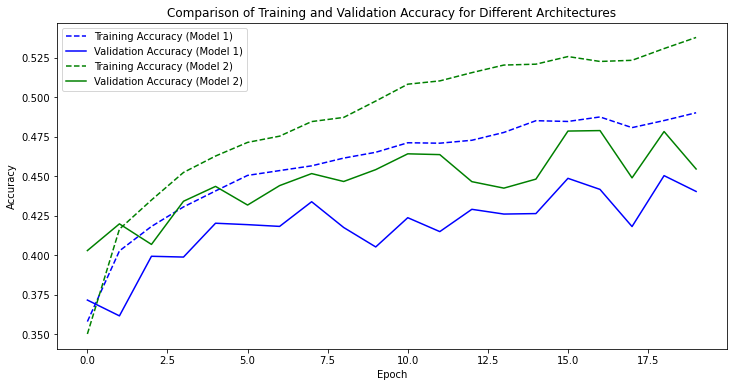

In [ ]:
# Plot training and validation accuracy for the three models with different line colors
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'orange']

for i, history in enumerate(history_list):
    plt.plot(history[0]['accuracy'], label=f'Training Accuracy (Model {i + 1})', linestyle='--', color=colors[i])
    plt.plot(history[0]['val_accuracy'], label=f'Validation Accuracy (Model {i + 1})', color=colors[i])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison of Training and Validation Accuracy for Different Architectures')
plt.show()


# 9. Regularisations

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)



In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold
import time


# Function to create a model with a specified dropout and L2 regularization
def create_model(dropout_rate=None, l2_reg_factor=None):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

    if dropout_rate is not None:
        model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg_factor) if l2_reg_factor is not None else None))
    model.add(tf.keras.layers.BatchNormalization())

    if dropout_rate is not None:
        model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg_factor) if l2_reg_factor is not None else None))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models
#original_model = create_model()
dropout_model = create_model(dropout_rate=0.25)
dropout_l2_model = create_model(dropout_rate=0.25, l2_reg_factor=1e-04)

# Train and evaluate models
models = [dropout_model, dropout_l2_model]
history_list = []

for i, model in enumerate(models):
    print(f"\nTraining Model {i + 1}")

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold = 1
    fold_histories = []

    for train_index, val_index in kf.split(train_images):
        print(f"\nTraining on Fold {fold}")
        X_train, X_val = train_images[train_index], train_images[val_index]
        y_train, y_val = train_labels[train_index], train_labels[val_index]

        start_time = time.time()

        # Train the model for 20 epochs
        history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

        fold_histories.append(history.history)

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"\nTime taken for Fold {fold}: {elapsed_time:.2f} seconds")

        fold += 1

    history_list.append(fold_histories)



Training Model 1

Training on Fold 1
Epoch 1/20
1250/1250 [==============================] - 13s 9ms/step - loss: 2.0210 - accuracy: 0.2892 - val_loss: 1.7609 - val_accuracy: 0.3709
Epoch 2/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.8190 - accuracy: 0.3492 - val_loss: 1.6968 - val_accuracy: 0.4002
Epoch 3/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7623 - accuracy: 0.3695 - val_loss: 1.6461 - val_accuracy: 0.4115
Epoch 4/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7232 - accuracy: 0.3851 - val_loss: 1.6094 - val_accuracy: 0.4297
Epoch 5/20
1250/1250 [==============================] - 10s 8ms/step - loss: 1.6939 - accuracy: 0.3961 - val_loss: 1.5759 - val_accuracy: 0.4438
Epoch 6/20
1250/1250 [==============================] - 11s 8ms/step - loss: 1.6703 - accuracy: 0.4062 - val_loss: 1.5630 - val_accuracy: 0.4460
Epoch 7/20
1250/1250 [==============================] - 11s 8ms/step - loss: 1.6597 - accura

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = dropout_model.evaluate(test_images, test_labels)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 1.3243 - accuracy: 0.5310

Test Accuracy: 53.10%
Test Loss: 1.3243


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = dropout_l2_model.evaluate(test_images, test_labels)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 [==============================] - 1s 4ms/step - loss: 1.3845 - accuracy: 0.5306

Test Accuracy: 53.06%
Test Loss: 1.3845


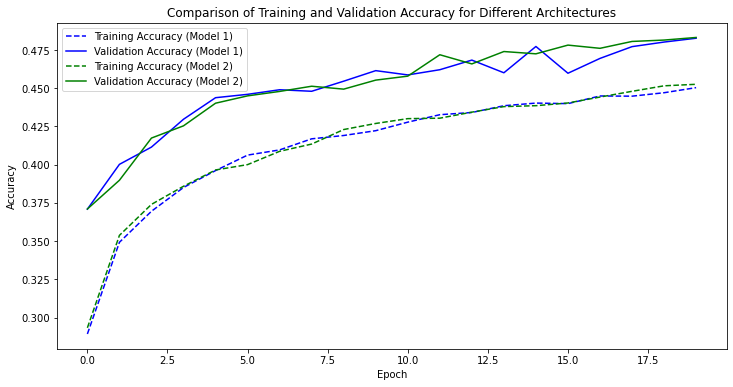

In [ ]:
# Plot training and validation accuracy for the three models with different line colors
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'orange']

for i, history in enumerate(history_list):
    plt.plot(history[0]['accuracy'], label=f'Training Accuracy (Model {i + 1})', linestyle='--', color=colors[i])
    plt.plot(history[0]['val_accuracy'], label=f'Validation Accuracy (Model {i + 1})', color=colors[i])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison of Training and Validation Accuracy for Different Architectures')
plt.show()


# 10. Optimisers

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
import tensorflow as tf
from sklearn.model_selection import KFold
import time


# Function to create a model with a specified optimizer
def create_model(optimizer='sgd'):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create models with different optimizers
#sgd_model = create_model(optimizer='sgd')
rmsprop_model = create_model(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9))
adam_model = create_model(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999))

# Train and evaluate models
models = [rmsprop_model, adam_model]
history_list = []

for i, model in enumerate(models):
    print(f"\nTraining Model {i + 1}")

    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    fold = 1
    fold_histories = []

    for train_index, val_index in kf.split(train_images):
        print(f"\nTraining on Fold {fold}")
        X_train, X_val = train_images[train_index], train_images[val_index]
        y_train, y_val = train_labels[train_index], train_labels[val_index]

        start_time = time.time()

        # Train the model for 20 epochs
        history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=1)

        fold_histories.append(history.history)

        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"\nTime taken for Fold {fold}: {elapsed_time:.2f} seconds")

        fold += 1

    history_list.append(fold_histories)



Training Model 1

Training on Fold 1
Epoch 1/20
1250/1250 [==============================] - 18s 13ms/step - loss: 1.7619 - accuracy: 0.3801 - val_loss: 1.8975 - val_accuracy: 0.3245
Epoch 2/20
1250/1250 [==============================] - 16s 13ms/step - loss: 1.6194 - accuracy: 0.4285 - val_loss: 1.7146 - val_accuracy: 0.4024
Epoch 3/20
1250/1250 [==============================] - 15s 12ms/step - loss: 1.5713 - accuracy: 0.4446 - val_loss: 1.6559 - val_accuracy: 0.4220
Epoch 4/20
1250/1250 [==============================] - 14s 12ms/step - loss: 1.5344 - accuracy: 0.4581 - val_loss: 1.7227 - val_accuracy: 0.4072
Epoch 5/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4920 - accuracy: 0.4715 - val_loss: 1.6355 - val_accuracy: 0.4260
Epoch 6/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4710 - accuracy: 0.4805 - val_loss: 1.5928 - val_accuracy: 0.4443
Epoch 7/20
1250/1250 [==============================] - 14s 11ms/step - loss: 1.4501 -

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = rmsprop_model.evaluate(test_images, test_labels)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 1.6177 - accuracy: 0.4785

Test Accuracy: 47.85%
Test Loss: 1.6177


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = adam_model.evaluate(test_images, test_labels)

print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 1.6230 - accuracy: 0.4649

Test Accuracy: 46.49%
Test Loss: 1.6230


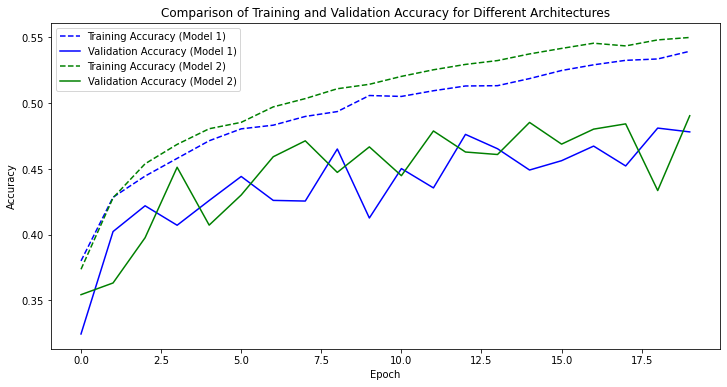

In [ ]:
# Plot training and validation accuracy for the three models with different line colors
plt.figure(figsize=(12, 6))
colors = ['blue', 'green', 'orange']

for i, history in enumerate(history_list):
    plt.plot(history[0]['accuracy'], label=f'Training Accuracy (Model {i + 1})', linestyle='--', color=colors[i])
    plt.plot(history[0]['val_accuracy'], label=f'Validation Accuracy (Model {i + 1})', color=colors[i])

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Comparison of Training and Validation Accuracy for Different Architectures')
plt.show()


# 11. Conclusion

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


> We can see from the evaluation that, Regularisations technique (Dropout of ratio 0.25) performed better.
>> Test Accuracy score 53.10 %